In [700]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# A quick look at the data

In [702]:
train_df=pd.read_csv("train.csv")

In [703]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [704]:
train_df.shape

(891, 12)

In [705]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [706]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [707]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [708]:
train_df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

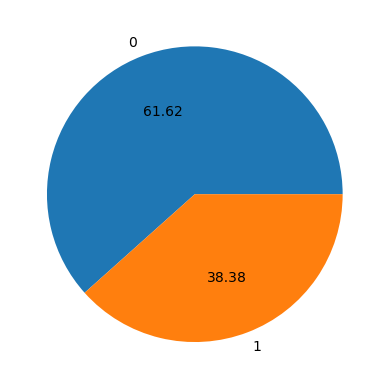

In [709]:
plt.pie(train_df['Survived'].value_counts(),autopct="%.2f",labels=train_df['Survived'].unique())
plt.show()

The dataset is imbalanced. And prediction of survival is important so F1-score is the best performance metric.

# Feature Engineering

In [712]:
train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [713]:
train_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [714]:
train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
train_df['Title'] = train_df['Title'].replace(['Mlle', 'Ms'], 'Miss')
train_df['Title'] = train_df['Title'].replace(['Mme'], 'Mrs')
train_df['Title'] = train_df['Title'].replace(['Countess', 'Lady', 'Dona'], 'Royalty')
train_df['Title'] = train_df['Title'].replace(['Jonkheer', 'Don', 'Sir',], 'Noble')
train_df['Title'] = train_df['Title'].replace(['Capt', 'Col', 'Major'], 'Military')

<Axes: xlabel='Title', ylabel='count'>

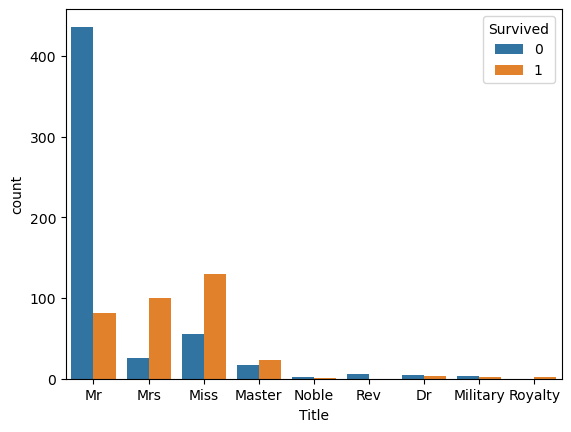

In [715]:
sns.countplot(data=train_df,x='Title',hue='Survived')

Death rate of married men is higher.

In [717]:
train_df['Ticket_Count'] = train_df.groupby('Ticket')['Ticket'].transform('count')

In [718]:
train_df['Ticket_Count'].value_counts()

Ticket_Count
1    547
2    188
3     63
4     44
7     21
6     18
5     10
Name: count, dtype: int64

<Axes: xlabel='Ticket_Count', ylabel='count'>

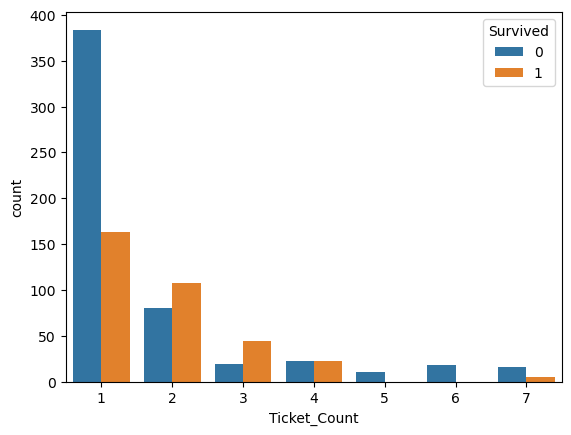

In [719]:
sns.countplot(data=train_df,x='Ticket_Count',hue='Survived')

In [720]:
train_df['Family_Size'] = train_df['SibSp'] + train_df['Parch']+1

<Axes: xlabel='Family_Size', ylabel='count'>

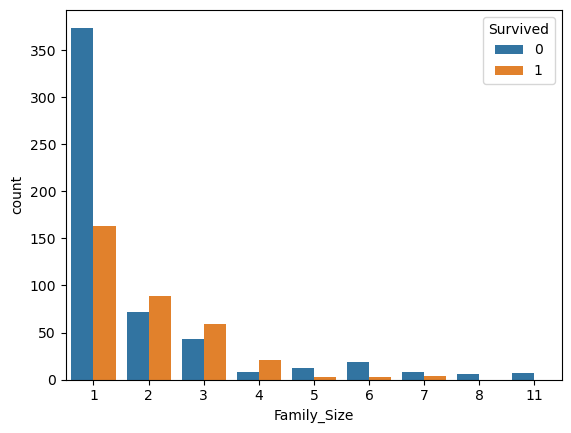

In [721]:
sns.countplot(data=train_df,x='Family_Size',hue='Survived')

Death rate in smaller families is higher

In [723]:
train_df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

# Handle Missing Values

In [725]:
train_df['Embarked'].fillna('S', inplace=True)
train_df['Age']=train_df['Age'].fillna(train_df['Age'].mean())

In [726]:
train_df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          0
Title             0
Ticket_Count      0
Family_Size       0
dtype: int64

# EDA

## EDA on numerical data columns

<Axes: xlabel='Age', ylabel='Count'>

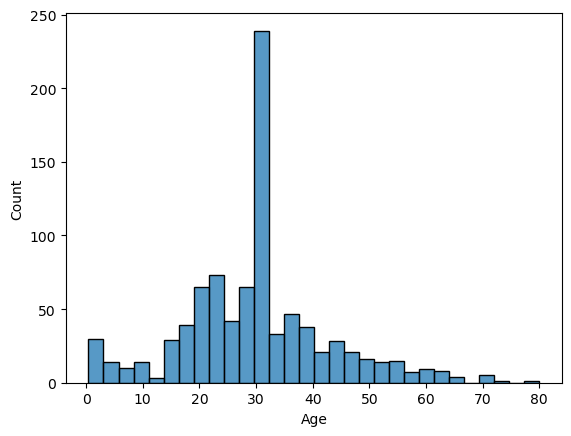

In [729]:
sns.histplot(train_df['Age'])

The distribution of Age column is right skewed. 

<Axes: >

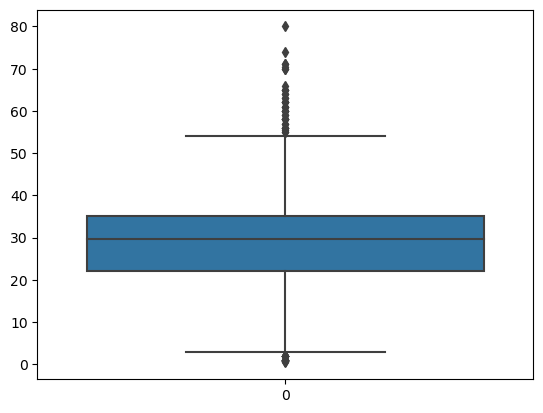

In [731]:
sns.boxplot(train_df['Age'])

Age column has outliers. The age value above 57 are outliers.

<Axes: xlabel='Fare', ylabel='Count'>

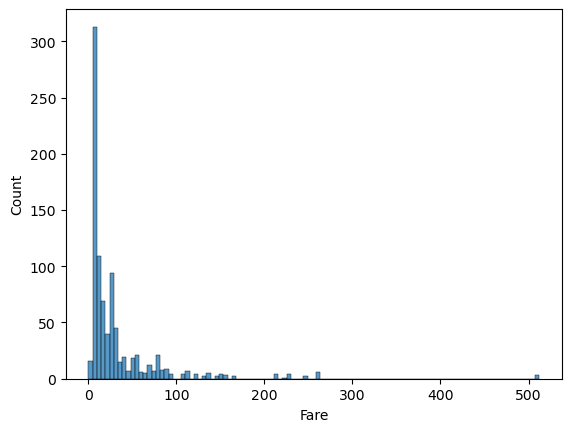

In [733]:
sns.histplot(train_df['Fare'])

The distribution of Fare column is right skewed. 

<Axes: >

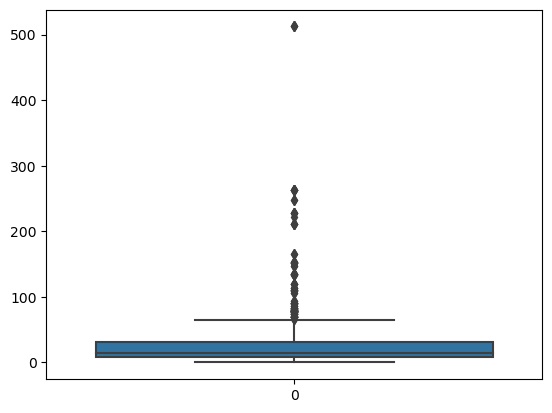

In [735]:
sns.boxplot(train_df['Fare'])

In [736]:
train_df[train_df["Fare"]>60]["Fare"].count()

122

#### Dataset is small if we remove 100 points then end up loosing lot of data. So we can only remove outliers from Age column

### Remove outliers

In [739]:
train_df = train_df[(train_df["Age"] > 2) & (train_df["Age"] < 57)]

# EDA on categorical columns

<Axes: xlabel='Pclass', ylabel='count'>

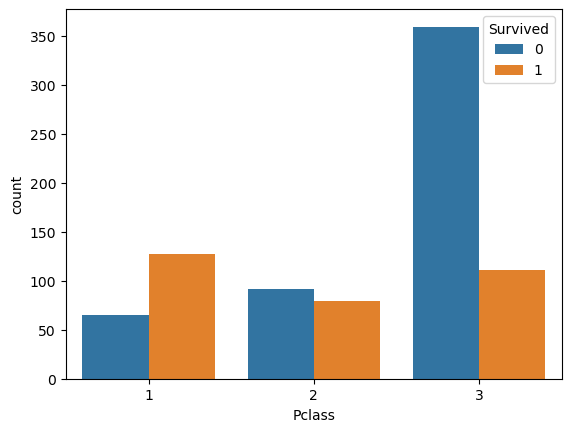

In [741]:
sns.countplot(data=train_df,x='Pclass',hue='Survived')

Survival rate is higher in P1 and P2 class

<Axes: xlabel='Sex', ylabel='count'>

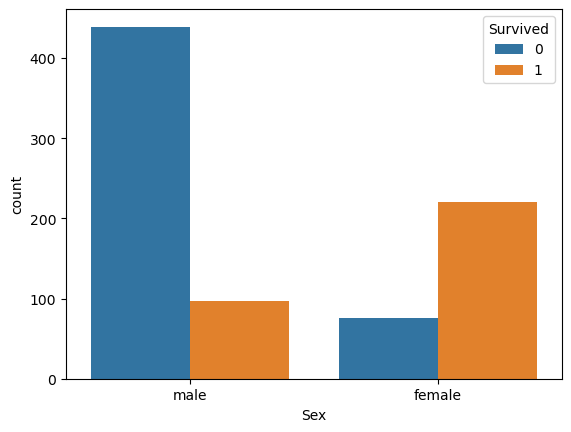

In [743]:
sns.countplot(data=train_df,x='Sex',hue='Survived')

Survival rate is higher in females.

<Axes: xlabel='Embarked', ylabel='count'>

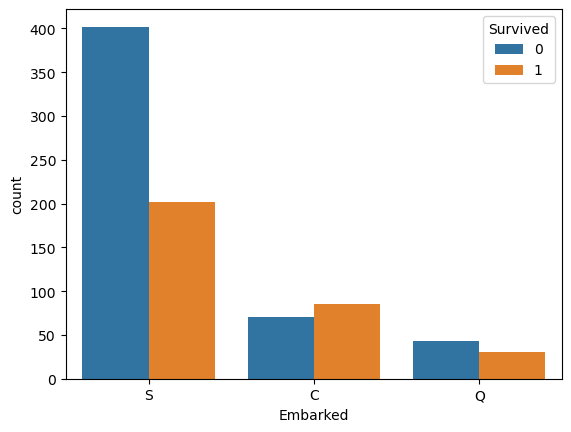

In [745]:
sns.countplot(data=train_df,x='Embarked',hue='Survived')

Survival rate is higher in C and Q class.

/Users/namratavairagkar/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


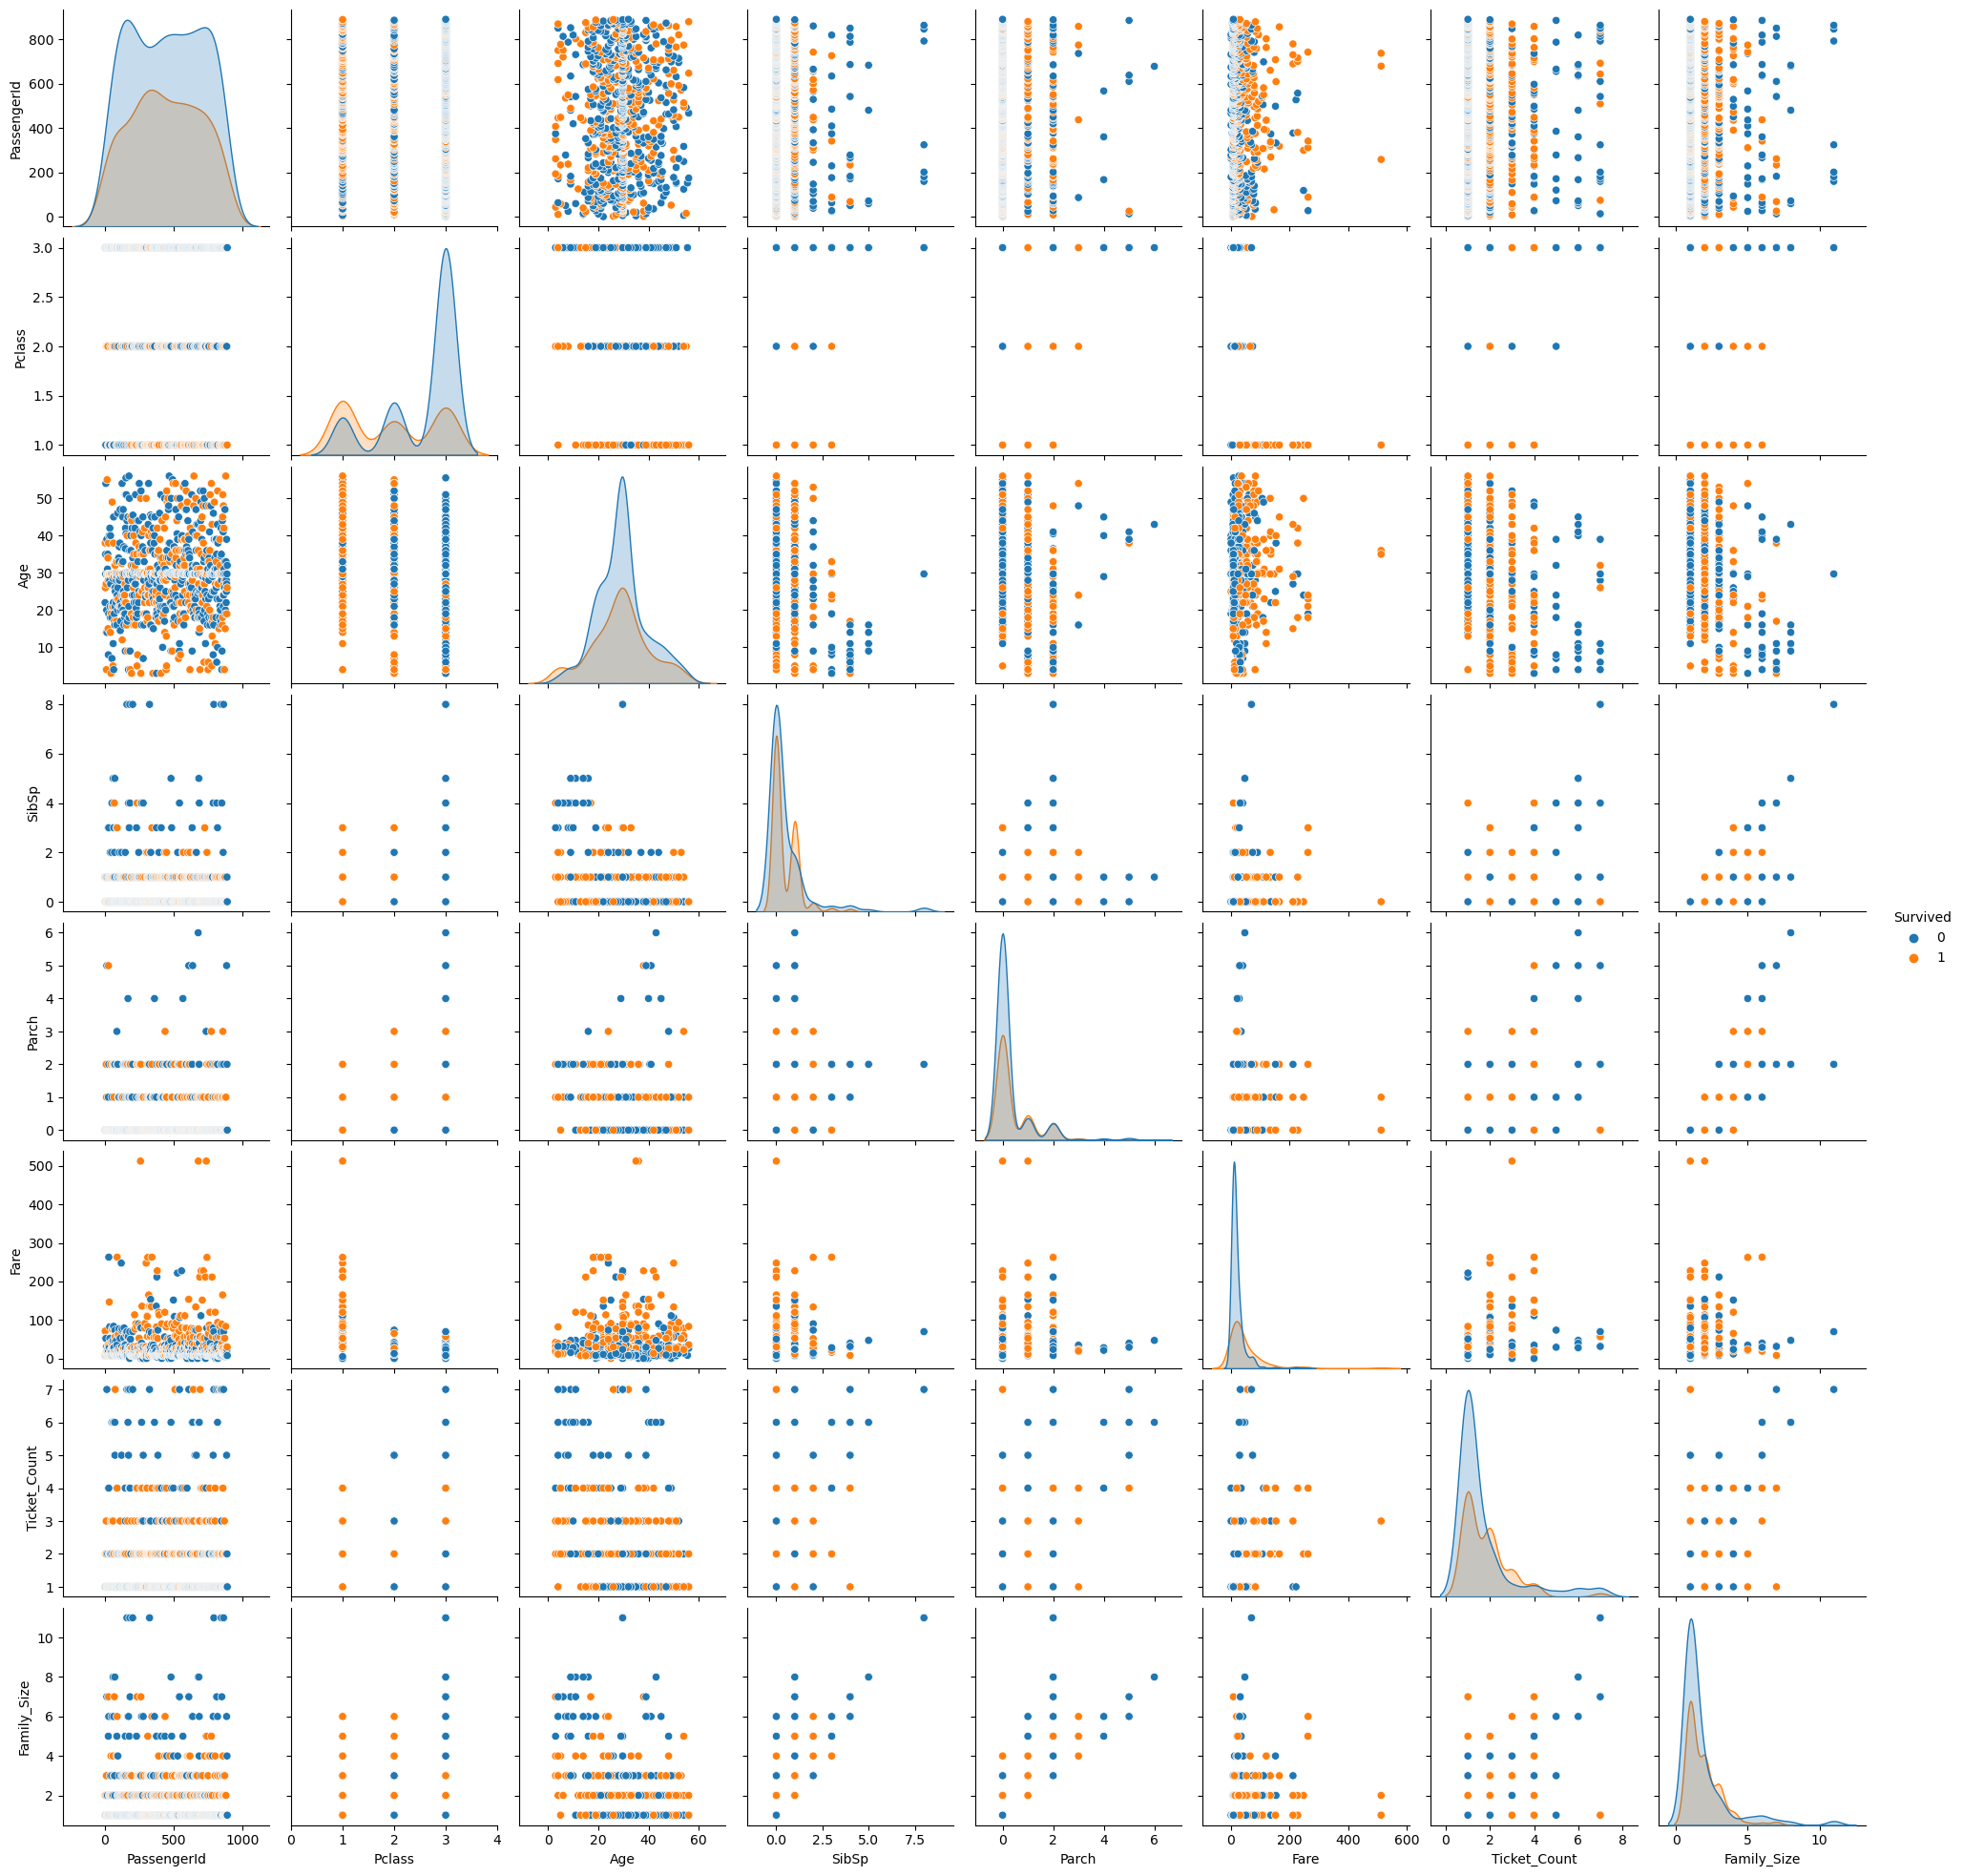

In [747]:
sns.pairplot(data=train_df,hue="Survived")
plt.show()

No significant conclusion can be drawn from pairplots

# Convert categorical columns to numerical

In [750]:
from sklearn.preprocessing import OneHotEncoder

In [751]:
OHE=OneHotEncoder(sparse_output=False)

In [752]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Ticket_Count,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,1


In [753]:
categorical_columns=['Sex','Embarked','Title']
one_hot_array=OHE.fit_transform(train_df[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_array, columns=OHE.get_feature_names_out(categorical_columns))
train_df=train_df.reset_index()
one_hot_df=one_hot_df.reset_index()
train_df = pd.concat([train_df, one_hot_df], axis=1)

<Axes: >

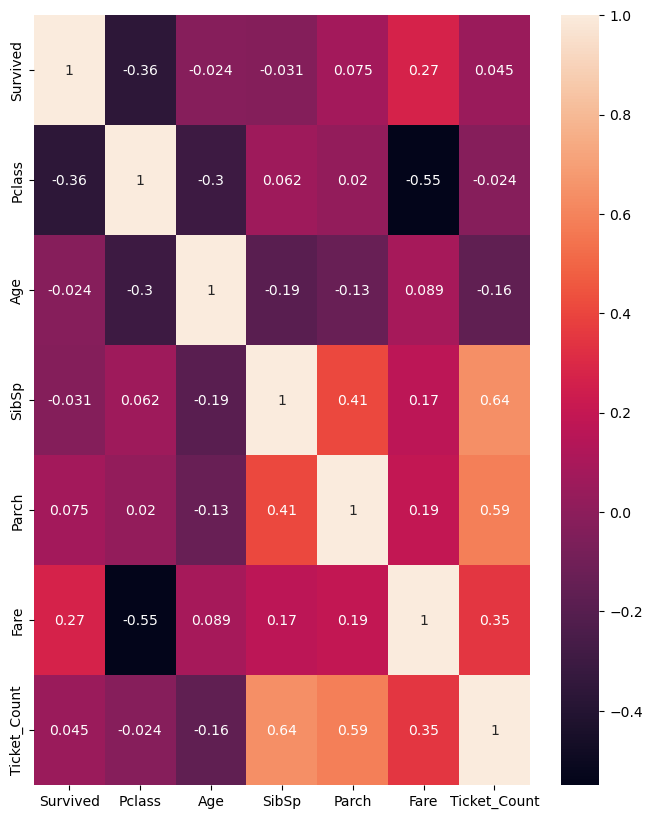

In [754]:
fig, ax = plt.subplots(figsize=(8,10)) 
sns.heatmap(train_df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Ticket_Count']].corr(),annot=True)

<Axes: >

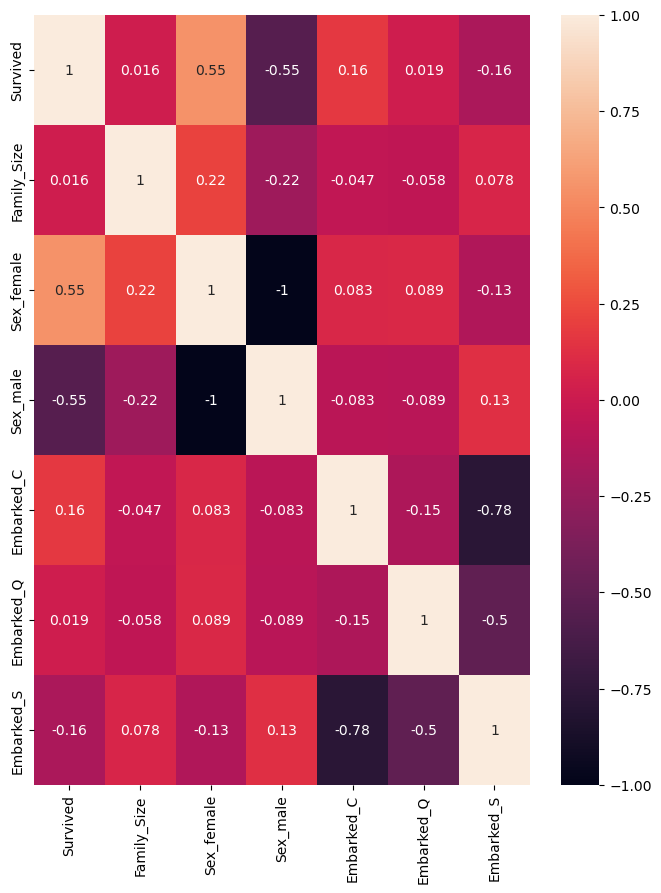

In [755]:
fig, ax = plt.subplots(figsize=(8,10)) 
sns.heatmap(train_df[['Survived', 'Family_Size', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S']].corr(),annot=True)

<Axes: >

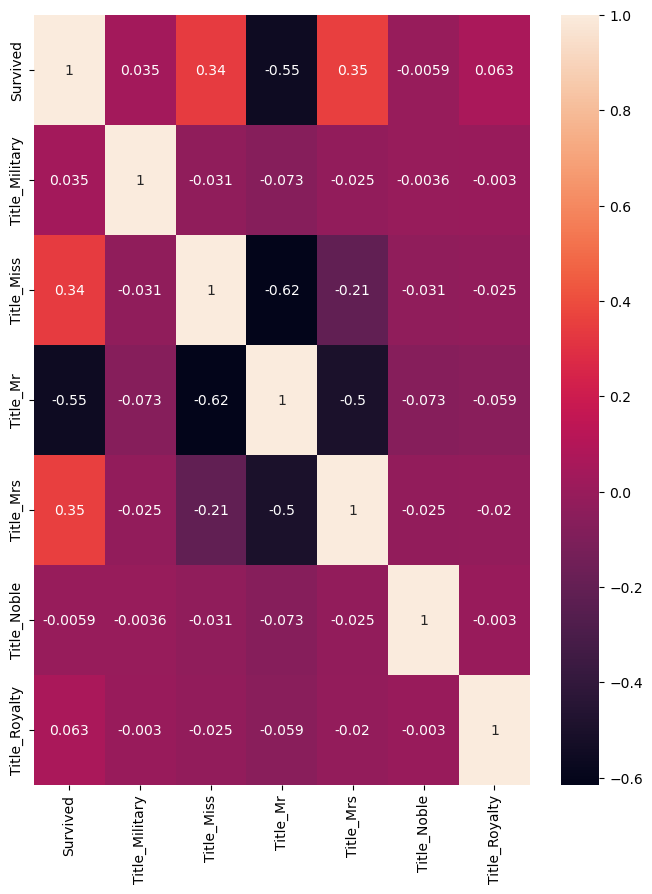

In [756]:
fig, ax = plt.subplots(figsize=(8,10)) 
sns.heatmap(train_df[['Survived','Title_Military', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Noble', 'Title_Royalty']].corr(),annot=True)

In [757]:
train_df=train_df.drop(columns=['Sex','Embarked','index','Cabin','PassengerId','Name',
                                'Ticket','Title','Title_Noble',
                                'Title_Rev','Title_Royalty','Title_Dr','Title_Military',
                                'SibSp'])

In [758]:
from sklearn.model_selection import train_test_split

In [759]:
y=train_df['Survived']
X=train_df.drop(columns=['Survived'])

In [760]:
X.shape

(832, 15)

In [761]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=22)

In [762]:
X_train.head()

,Pclass,Age,Parch,Fare,Ticket_Count,Family_Size,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs
483,2,36.000000,0,26.00,1,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
41,3,29.699118,0,8.05,1,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
285,2,30.000000,0,24.00,2,2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
185,3,28.000000,0,9.50,1,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
659,1,22.000000,0,151.55,4,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [763]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [764]:
LR=LogisticRegression(max_iter=1000)
LR_clf=LR.fit(X_train,y_train)
y_pred=LR_clf.predict(X_test)

In [765]:
print(f1_score(y_test,y_pred))

0.8059701492537313


In [766]:
from sklearn.ensemble import RandomForestClassifier

In [767]:
rfc=RandomForestClassifier(n_estimators=100)
rfc_clf=rfc.fit(X_train,y_train)
y_pred=rfc_clf.predict(X_test)

In [768]:
print(f1_score(y_test,y_pred))

0.757142857142857


### Logistic Regression classfier gives the best result.

# Predict the values in test_df

In [770]:
test_df=pd.read_csv("test.csv")

In [771]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [772]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [773]:
test_df['Title'] = test_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [774]:
test_df['Title'] = test_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_df['Title'] = test_df['Title'].replace(['Mlle', 'Ms'], 'Miss')
test_df['Title'] = test_df['Title'].replace(['Mme'], 'Mrs')
test_df['Title'] = test_df['Title'].replace(['Countess', 'Lady', 'Dona'], 'Royalty')
test_df['Title'] = test_df['Title'].replace(['Jonkheer', 'Don', 'Sir',], 'Noble')
test_df['Title'] = test_df['Title'].replace(['Capt', 'Col', 'Major'], 'Military')

In [775]:
test_df['Ticket_Count'] = test_df.groupby('Ticket')['Ticket'].transform('count')

In [776]:
test_df['Family_Size'] = test_df['SibSp'] + test_df['Parch']+1

In [777]:
test_df['Age']=test_df['Age'].fillna(test_df['Age'].mean())
test_df['Fare']=test_df['Fare'].fillna(test_df['Fare'].mean())

In [778]:
test_df.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           327
Embarked          0
Title             0
Ticket_Count      0
Family_Size       0
dtype: int64

In [779]:
categorical_columns=['Sex','Embarked','Title']
one_hot_array=OHE.transform(test_df[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_array, columns=OHE.get_feature_names_out(categorical_columns))
test_df=test_df.reset_index()
one_hot_df=one_hot_df.reset_index()
test_df = pd.concat([test_df, one_hot_df], axis=1)

In [780]:
IDtest = test_df["PassengerId"]

In [781]:
test_df=test_df.drop(columns=['Sex','Embarked','index','Cabin','Name','PassengerId',
                                'Ticket','Title','Title_Noble',
                                'Title_Rev','Title_Royalty','Title_Dr','Title_Military',
                                'SibSp'])

In [782]:
test_Survived = pd.Series(LR_clf.predict(test_df), name="Survived")
results = pd.concat([IDtest,test_Survived],axis=1)
results.to_csv("submission.csv",index=False)

In [783]:
submission_df=pd.read_csv('submission.csv')

In [784]:
submission_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
